# Non-linear regression

## Example 1: given data

In this example, experimental concentrations and measured initiral rates are provided. A model is proposed and fitted

SSR = 2.989e-01

     Value  95% CI Half Width  95% CI Half Width Rel %
b1  1.253              2.000                  159.633
b2  0.063              0.100                  160.033
b3  0.040              0.071                  177.858
b4  0.112              0.173                  154.188
b5  1.191              1.929                  161.948 



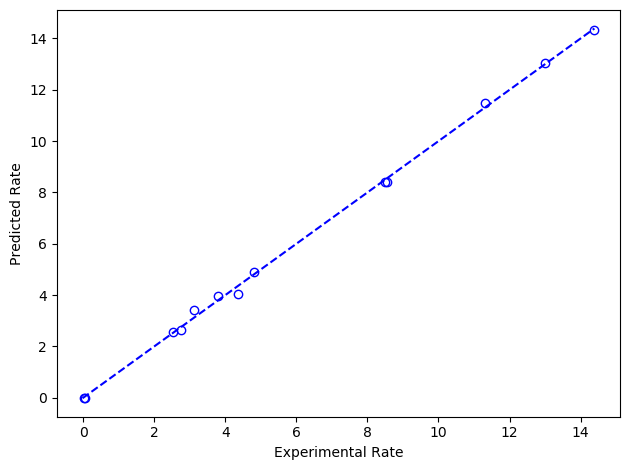

In [2]:
###### Non-linear regression example 1
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats.distributions import t as tdist

###### Data
rate_expt = [8.55,3.79,4.82,0.02,2.75,14.39,2.54,4.35,13,8.5,0.05,11.32,3.13]
CA_expt   = [470,285,470,470,470,100,100,470,100,100,100,285,285]
CB_expt   = [300,80,300,80,80,190,80,190,300,300,80,300,190]
CC_expt   = [10,10,120,120,10,10,65,65,54,120,120,10,120]

ndpts = len(rate_expt)

###### Reaction rate for a given k and a set of C_j
def ri(x,*parameters):
    
    CA = x[0]
    CB = x[1]
    CC = x[2]
    
    b1 = parameters[0]
    b2 = parameters[1]
    b3 = parameters[2]
    b4 = parameters[3]
    b5 = parameters[4]
    
    r = (b1*CB-CC/b5)/(1+b2*CA+b3*CB+b4*CC)
    
    return r

###### Reaction rates for a full data set given k and several C_j
def initial_rate_model(x,*parameters):
    
    ### Independent variables
    CA = x[0,:]
    CB = x[1,:]
    CC = x[2,:]
    ndpts = len(CA)
    
    ### Parameters to be fit          
    b1 = parameters[0]   
    b2 = parameters[1]
    b3 = parameters[2]
    b4 = parameters[3]
    b5 = parameters[4]
    
    ### Calculate output value for each data point based on a model
    rate_model = np.zeros(ndpts)
    for i in range(ndpts):
        rate_model[i] = ri(x[:,i],*parameters)
    return rate_model

###### Regression

### Parameter guesses
b1_g = 1
b2_g = 0.1
b3_g = 0.1
b4_g = 0.1
b5_g = 1
guess = [b1_g,b2_g,b3_g,b4_g,b5_g]
npars = len(guess)

### Perform regression
xvars = np.array([CA_expt,CB_expt,CC_expt])
popt,pcov = curve_fit(initial_rate_model,xvars,rate_expt,guess,method='lm')

####### Confidence intervals

### Calculate Student's t value
alpha = 0.05 # 95% confidence interval
dof = ndpts-npars # number of degrees of freedom
tval = tdist.ppf(1.0-alpha/2.0,dof) # student t value for the dof and confidence level

### Confidence interval calculation
sigma = np.sqrt(np.diag(pcov))
ci_half = sigma*tval
ci = np.hstack((popt-ci_half,popt+ci_half))

### Generate matrix of predicted rates and calculate sum of squares
rate_predict = initial_rate_model(xvars,*popt)
sqr_resid = (rate_predict-rate_expt)**2
ssr = sum(sqr_resid)
print('SSR = ' + "{:.3e}".format(ssr))

### Create output dataframe
param_names = ['b1','b2','b3','b4','b5']
b1,b2,b3,b4,b5 = popt
soln = pd.DataFrame(popt,index=param_names,columns=['Value'])
soln['95% CI Half Width'] = ci_half
soln['95% CI Half Width Rel %'] = ci_half/popt*100
pd.options.display.float_format = "{:,.3f}".format
print('\n', soln, '\n')

###### Parity plots

### Parity line
x_parity = [min([min(rate_expt),min(rate_predict)]),max([max(rate_expt),max(rate_predict)])]
y_parity = [min([min(rate_expt),min(rate_predict)]),max([max(rate_expt),max(rate_predict)])]
    
### Plot data
fig = plt.figure()
ax1 = plt.subplot(111)

ax1.plot(rate_expt,rate_predict,'ob',mfc='none')
ax1.plot(x_parity,y_parity,'--b')
ax1.set_xlabel('Experimental Rate')
ax1.set_ylabel('Predicted Rate')

fig.tight_layout()

plt.show()

## Example 2: generating and fitting data


 True rate = 
 [0.16666667 0.66666667 1.5        2.66666667 0.16666667 0.16666667
 0.16666667 0.1        0.07142857 0.05555556]

 Experimental rate =
 [0.15180133, 0.64136726, 1.38892509, 2.75117726, 0.16706375, 0.15192908, 0.15336446, 0.10236551, 0.06573618, 0.06004724]

 SSR = 2.067e-02

    Value  95% CI Half Width  95% CI Half Width Rel %
k  0.502              1.729                  344.168
K  2.004             10.333                  515.672 



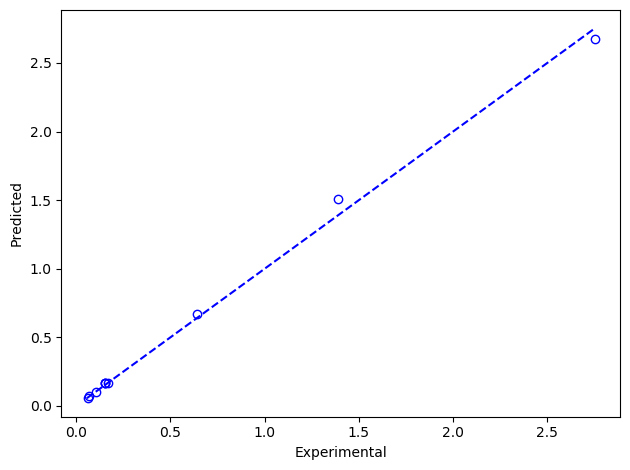

In [33]:
###### Non-linear regression example 2

%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats.distributions import t as tdist

def ri(x,*parameters):
    
    ### Independent variables
    C_E = x[0]
    C_B = x[1]
    C_W = x[2]
    
    ### Parameters to be fit          
    k = parameters[0]   
    K = parameters[1]
    
    r = k * C_E**2 / (1 + K * C_W)
    
    return r

def initial_rate_model(x,*parameters):
    
    ### Independent variables
    C_E_0 = x[0,:]
    C_B_0 = x[1,:]
    C_W_0 = x[2,:]
    ndpts = len(C_E_0)
    
    ### Parameters to be fit          
    k = parameters[0]   
    K = parameters[1]
    
    ### Calculate output value for each data point based on a model
    rate_model = np.zeros(ndpts)
    for i in range(ndpts):      
        rate_model[i] = ri(x[:,i],k,K)
    return rate_model

###### Generate a dataset with error

### Initial concentrations
C_E_0_expt = np.array([1.0,2.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0])
C_B_0_expt = np.array([1.0,1.0,1.0,1.0,2.0,3.0,4.0,1.0,1.0,1.0])
C_W_0_expt = np.array([1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0])
ndpts = len(C_E_0_expt)

xexpt = np.array([C_E_0_expt,C_B_0_expt,C_W_0_expt])

### Calculate expected rate for given parameter set
k_actual = 0.5
K_actual = 2.0

parameters=[k_actual,K_actual]

rate_true = initial_rate_model(xexpt,*parameters)
print('\n True rate = \n',rate_true)

random_error = 2*(np.random.rand(ndpts)-0.5)/10+1 # +/- 5% random error
rate_expt = rate_true * random_error
#rate_expt = [0.15180133,0.64136726,1.38892509,2.75117726,0.16706375,0.15192908,0.15336446,0.10236551,0.06573618,0.06004724]
print('\n Experimental rate =\n',rate_expt)

####### Fit noisy data

### Parameter guesses
k_g = 1
K_g = 1

guess = [k_g,K_g]

npars = len(guess)

### Perform regression
xexpt = np.array([C_E_0_expt,C_B_0_expt,C_W_0_expt])
yexpt = rate_expt
popt,pcov = curve_fit(initial_rate_model,xexpt,yexpt,guess,method='lm')

####### Confidence intervals

### Calculate Student's t value
alpha = 0.05 # 95% confidence interval
dof = ndpts-npars # number of degrees of freedom
tval = tdist.ppf(1.0-alpha/2.0,dof) # student t value for the dof and confidence level

### Confidence interval calculation
sigma = np.sqrt(np.diag(pcov))
ci_half = sigma*tval
ci = np.hstack((popt-ci_half,popt+ci_half))

### Generate matrix of predicted rates and calculate sum of squares
ypredict = initial_rate_model(xexpt,*popt)
sqr_resid = (yexpt-ypredict)**2
ssr = sum(sqr_resid)
print('\n SSR = ' + "{:.3e}".format(ssr))

### Create output dataframe
param_names = ['k','K']
k,K = popt
soln = pd.DataFrame(popt,index=param_names,columns=['Value'])
soln['95% CI Half Width'] = ci_half
soln['95% CI Half Width Rel %'] = ci_half/popt*100
pd.options.display.float_format = "{:,.3f}".format
print('\n', soln, '\n')

###### Parity plots

### Parity line
xparity = [min([min(yexpt),min(ypredict)]),max([max(yexpt),max(ypredict)])]
yparity = [min([min(yexpt),min(ypredict)]),max([max(yexpt),max(ypredict)])]
    
### Plot data
fig = plt.figure()
ax1 = plt.subplot(111)

ax1.plot(yexpt,ypredict,'ob',mfc='none')
ax1.plot(xparity,yparity,'--b')
ax1.set_xlabel('Experimental')
ax1.set_ylabel('Predicted')

fig.tight_layout()

plt.show()
